### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
key = "VNM"
result = pd.read_csv(r'E:\Data_Stock\excel_vnm.csv')
result["Date"] = pd.to_datetime(result["<DTYYYYMMDD>"], format='%Y%m%d')
result['Open'] = pd.to_numeric(result['<OpenFixed>'].astype(str)) * 1000
result['Close'] = pd.to_numeric(result['<CloseFixed>'].astype(str)) * 1000
result['High'] = pd.to_numeric(result['<HighFixed>'].astype(str)) * 1000
result['Low'] = pd.to_numeric(result['<LowFixed>'].astype(str)) * 1000
result['Volume'] = pd.to_numeric(result['<Volume>'].astype(str))
data_finish = result[['Date','Open','High','Low' ,'Close','Volume']].copy()
#data_finish

In [4]:
df = data_finish

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2006-01-19,2688.3,2688.3,2688.3,2688.3,109350
1,2006-01-20,2688.3,2789.7,2688.3,2739.0,157840
2,2006-01-23,2739.0,2739.0,2662.9,2662.9,81400
3,2006-01-24,2662.9,2662.9,2637.6,2637.6,66000
4,2006-01-25,2637.6,2688.3,2637.6,2688.3,57220


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume
4040,2022-04-04,82000.0,82500.0,81500.0,82200.0,3808700
4041,2022-04-05,81800.0,81800.0,80400.0,80400.0,2202100
4042,2022-04-06,80000.0,81200.0,79100.0,79300.0,4306700
4043,2022-04-07,79900.0,80000.0,78500.0,78500.0,1760300
4044,2022-04-08,78500.0,79100.0,77300.0,77300.0,2738300


In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1

0        2688.3
1        2739.0
2        2662.9
3        2637.6
4        2688.3
         ...   
4040    82200.0
4041    80400.0
4042    79300.0
4043    78500.0
4044    77300.0
Name: Close, Length: 4045, dtype: float64

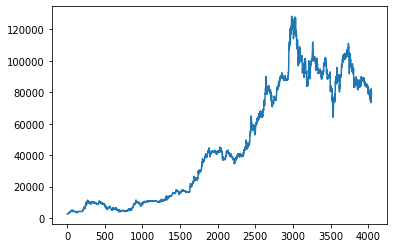

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
df1

0        2688.3
1        2739.0
2        2662.9
3        2637.6
4        2688.3
         ...   
4040    82200.0
4041    80400.0
4042    79300.0
4043    78500.0
4044    77300.0
Name: Close, Length: 4045, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[4.03304391e-04]
 [8.06608783e-04]
 [2.01254460e-04]
 ...
 [6.09828059e-01]
 [6.03464281e-01]
 [5.93918615e-01]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(2831, 1214)

In [15]:
train_data

array([[4.03304391e-04],
       [8.06608783e-04],
       [2.01254460e-04],
       ...,
       [6.76037594e-01],
       [6.76037594e-01],
       [6.86280889e-01]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(2730, 100)
(2730,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(1113, 100)
(1113,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/500
43/43 [==============================] - 11s 158ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 2/500
43/43 [==============================] - 5s 114ms/step - loss: 2.0029e-04 - val_loss: 0.0015
Epoch 3/500
43/43 [==============================] - 5s 114ms/step - loss: 1.7753e-04 - val_loss: 0.0017
Epoch 4/500
43/43 [==============================] - 5s 115ms/step - loss: 1.6340e-04 - val_loss: 0.0014
Epoch 5/500
43/43 [==============================] - 5s 114ms/step - loss: 1.8244e-04 - val_loss: 0.0013
Epoch 6/500
43/43 [==============================] - 5s 118ms/step - loss: 1.5082e-04 - val_loss: 0.0017
Epoch 7/500
43/43 [==============================] - 5s 121ms/step - loss: 1.5847e-04 - val_loss: 0.0017
Epoch 8/500
43/43 [==============================] - 5s 123ms/step - loss: 1.5349e-04 - val_loss: 0.0017
Epoch 9/500
43/43 [==============================] - 5s 120ms/step - loss: 1.6428e-04 - val_loss: 0.0012
Epoch 10/500
43/43 [==============================] - 5s 1

In [25]:
import tensorflow as tf

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35467.205037429114

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

95145.40622919929

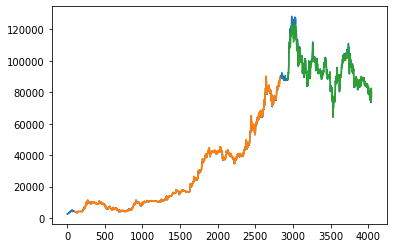

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

1214

In [37]:
# Giá trị tại len(test_data) - 100 
x_input=test_data[1114:].reshape(1,-1)
x_input.shape


(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.6777001308551724,
 0.675353487946608,
 0.6722233049482347,
 0.6737879987113351,
 0.6675292236589334,
 0.6526634397012206,
 0.6534461843188571,
 0.6542281334643212,
 0.6636170915150961,
 0.6636170915150961,
 0.6698766620396702,
 0.6636170915150961,
 0.6643998361327326,
 0.6636170915150961,
 0.6628343468974597,
 0.6503160013204837,
 0.646404664648819,
 0.6557928272274216,
 0.6518814905557567,
 0.6597049593712587,
 0.6542281334643212,
 0.6550108780819575,
 0.6542281334643212,
 0.6542281334643212,
 0.6565755718450579,
 0.6495340521750198,
 0.6495340521750198,
 0.6479693584119194,
 0.6471866137942829,
 0.6417097878873453,
 0.6518814905557567,
 0.6526634397012206,
 0.6479693584119194,
 0.6456219200311825,
 0.646404664648819,
 0.6550108780819575,
 0.6573583164626943,
 0.6534461843188571,
 0.6471866137942829,
 0.6456219200311825,
 0.644828834275305,
 0.644828834275305,
 0.6400560012409366,
 0.6400560012409366,
 0.6527835559992523,
 0.6480107229648839,
 0.6424424177581208,
 0.642442417758120

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
# i 30
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.59784865]
101
[[[0.67535349]
  [0.6722233 ]
  [0.673788  ]
  [0.66752922]
  [0.65266344]
  [0.65344618]
  [0.65422813]
  [0.66361709]
  [0.66361709]
  [0.66987666]
  [0.66361709]
  [0.66439984]
  [0.66361709]
  [0.66283435]
  [0.650316  ]
  [0.64640466]
  [0.65579283]
  [0.65188149]
  [0.65970496]
  [0.65422813]
  [0.65501088]
  [0.65422813]
  [0.65422813]
  [0.65657557]
  [0.64953405]
  [0.64953405]
  [0.64796936]
  [0.64718661]
  [0.64170979]
  [0.65188149]
  [0.65266344]
  [0.64796936]
  [0.64562192]
  [0.64640466]
  [0.65501088]
  [0.65735832]
  [0.65344618]
  [0.64718661]
  [0.64562192]
  [0.64482883]
  [0.64482883]
  [0.640056  ]
  [0.640056  ]
  [0.65278356]
  [0.64801072]
  [0.64244242]
  [0.64244242]
  [0.63926053]
  [0.63607864]
  [0.62335109]
  [0.60903259]
  [0.61300995]
  [0.640056  ]
  [0.640056  ]
  [0.64323789]
  [0.63130581]
  [0.63766958]
  [0.63687411]
  [0.63130581]
  [0.62414656]
  [0.62494203]
  [0.61857825]
  [0.62176014]
  [0.6201692 ]
  [0.62335109]
  [0.615

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
len(df1)

4045

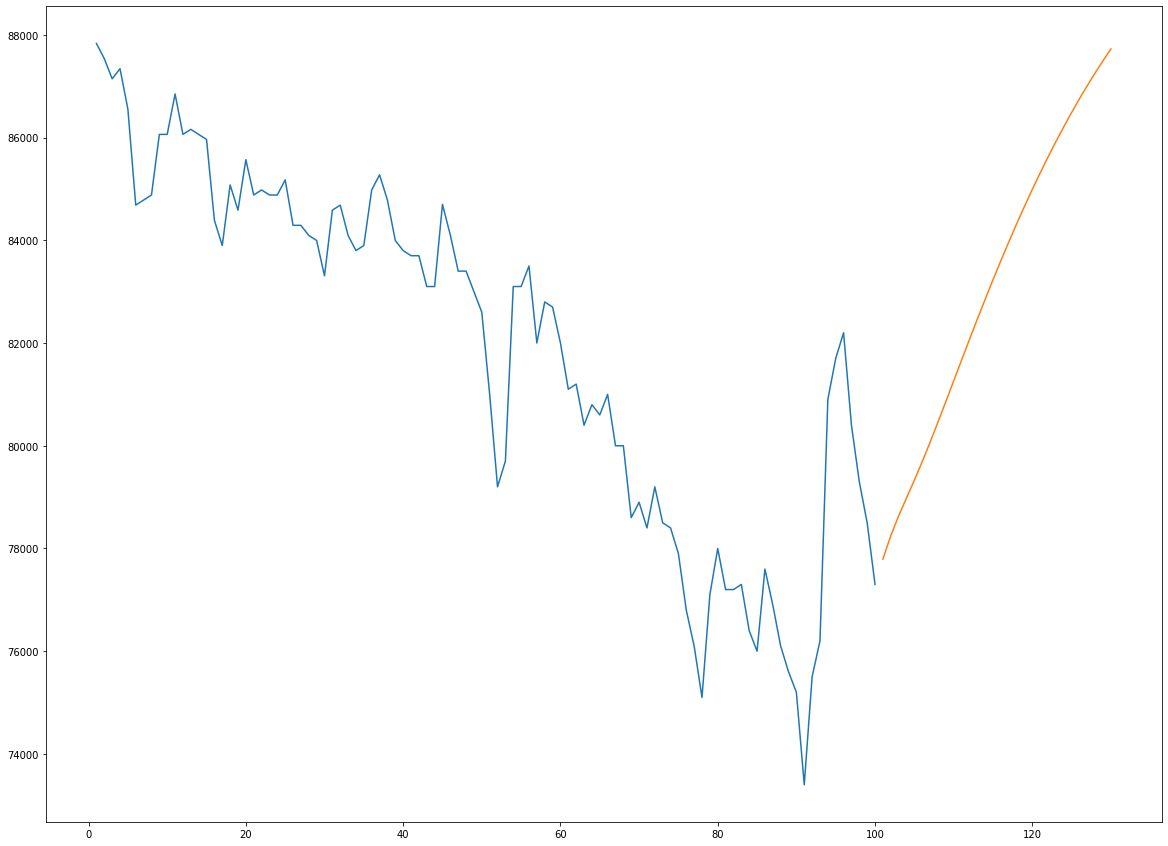

In [43]:
# giá trị tại len(df1) - 100
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(day_new,scaler.inverse_transform(df1[3945:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

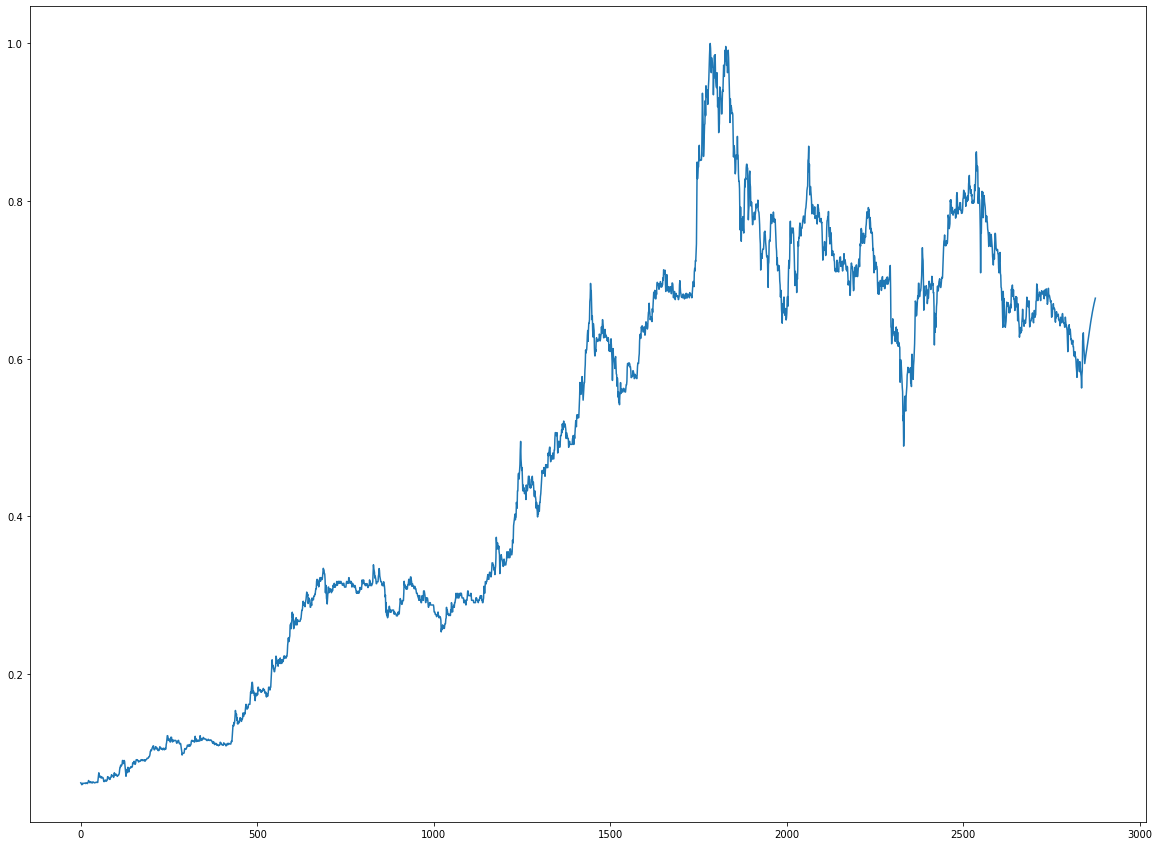

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

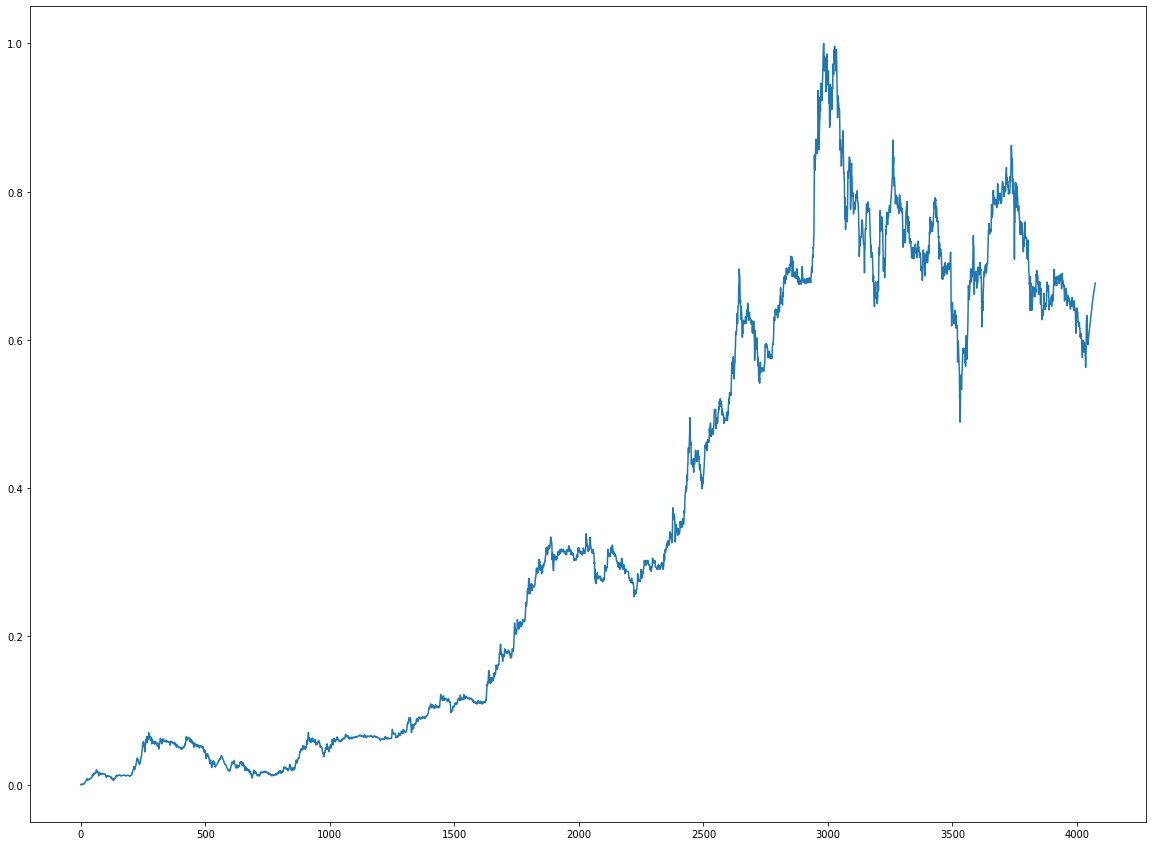

In [45]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(df3)


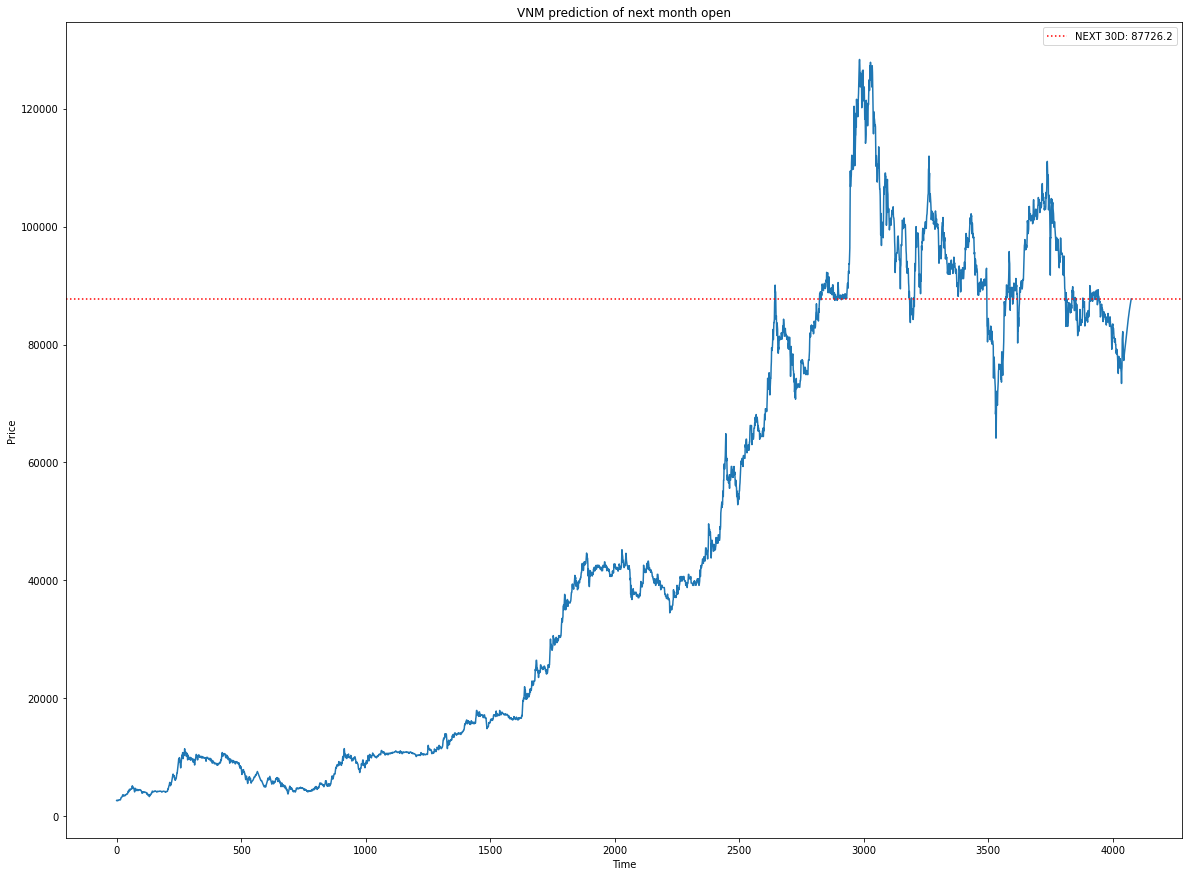

In [46]:
ds_new = df1.tolist()
ds_new.extend(lst_output)
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(key))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()